In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import gmaps
from census import Census

# Census API Key
from api_keys import api_key
c = Census(api_key, year=2018)


In [2]:
# Read in the Zillow Single family data
single_family_df = pd.read_csv('SingleFamily_US.csv')
single_family_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,102001,0,United States,Country,NaN,107509.0,107541.0,107597.0,107733.0,107887.0,...,246264,247157,248174,249345,250597,251788,253017,254490,256369,258552
1,394913,1,"New York, NY",Msa,NY,190242.0,189798.0,189517.0,188973.0,188640.0,...,475994,476831,477932,479203,480703,482357,484339,487076,490631,495329
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,190543.0,190841.0,190875.0,191020.0,191023.0,...,697864,701500,706956,712485,716996,718724,720013,724610,732217,740366
3,394463,3,"Chicago, IL",Msa,IL,167002.0,166692.0,166282.0,165813.0,165186.0,...,248769,249027,249405,250016,250560,251157,251896,253169,254873,257160
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,115301.0,115374.0,115539.0,115865.0,116215.0,...,261903,262368,263061,264089,265245,266371,267684,269203,270938,272699


In [3]:
# 5-Year Pricing increase 

five_year_housing_increase = single_family_df[['RegionID', 'SizeRank', 'RegionName','StateName', '9/30/2016','9/30/2017','9/30/2018','9/30/2019','9/30/2020']]
five_year_housing_increase.head(8)

,RegionID,SizeRank,RegionName,StateName,9/30/2016,9/30/2017,9/30/2018,9/30/2019,9/30/2020
0,102001,0,United States,NaN,207139.0,220430.0,234642,244162,258552
1,394913,1,"New York, NY",NY,422238.0,445497.0,467651,476535,495329
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",CA,609739.0,647509.0,685469,690677,740366
3,394463,3,"Chicago, IL",IL,223424.0,235228.0,245602,249418,257160
4,394514,4,"Dallas-Fort Worth, TX",TX,213975.0,234083.0,251852,260920,272699
5,394974,5,"Philadelphia, PA",PA,223557.0,232465.0,244052,252463,268118
6,394692,6,"Houston, TX",TX,200806.0,207592.0,216660,223568,232207
7,395209,7,"Washington, DC",DC,402366.0,417469.0,432261,443640,469854


In [4]:
# calculate 5-year price increase %

five_year_percent_inc = five_year_housing_increase['9/30/2020']/five_year_housing_increase['9/30/2016']-1
five_year_percent_inc

0      0.248205
1      0.173104
2      0.214234
3      0.150995
4      0.274443
         ...   
909    0.280807
910   -0.007553
911    0.517566
912    0.112384
913    0.090460
Length: 914, dtype: float64

In [5]:
# append % inc to the dataset
five_year_housing_increase['% of Inc'] = five_year_percent_inc
five_year_housing_increase

<ipython-input-5-2ed688738a3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_year_housing_increase['% of Inc'] = five_year_percent_inc


,RegionID,SizeRank,RegionName,StateName,9/30/2016,9/30/2017,9/30/2018,9/30/2019,9/30/2020,% of Inc
0,102001,0,United States,NaN,207139.0,220430.0,234642,244162,258552,0.248205
1,394913,1,"New York, NY",NY,422238.0,445497.0,467651,476535,495329,0.173104
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",CA,609739.0,647509.0,685469,690677,740366,0.214234
3,394463,3,"Chicago, IL",IL,223424.0,235228.0,245602,249418,257160,0.150995
4,394514,4,"Dallas-Fort Worth, TX",TX,213975.0,234083.0,251852,260920,272699,0.274443
...,...,...,...,...,...,...,...,...,...,...
909,394767,929,"Lamesa, TX",TX,60287.0,65467.0,69661,74524,77216,0.280807
910,753874,930,"Craig, CO",CO,190920.0,193167.0,189392,189975,189478,-0.007553
911,394968,931,"Pecos, TX",TX,86132.0,95634.0,106765,120577,130711,0.517566
912,395188,932,"Vernon, TX",TX,62304.0,66050.0,68435,69677,69306,0.112384


In [6]:
# group by State
grouped_state = five_year_housing_increase.groupby('StateName').mean()
grouped_state

,RegionID,SizeRank,9/30/2016,9/30/2017,9/30/2018,9/30/2019,9/30/2020,% of Inc
StateName,,,,,,,,
AK,394595.000000,565.750000,308459.500000,316272.750000,319276.000000,332741.750000,332180.500000,0.074364
AL,411830.333333,374.619048,112818.809524,116453.809524,122060.904762,127214.428571,135227.476190,0.190491
AR,412656.200000,571.250000,91220.900000,94984.800000,98921.950000,103107.400000,106684.900000,0.165465
AZ,394988.727273,325.272727,191720.181818,203693.090909,217927.636364,230183.272727,248400.000000,0.295034
CA,426591.235294,222.500000,396921.454545,421064.264706,452449.382353,452734.352941,480126.794118,0.230878
CO,479177.117647,494.764706,348916.352941,372094.176471,397796.705882,414621.000000,427329.941176,0.233738
CT,394815.600000,110.600000,284310.400000,294524.200000,299656.800000,300244.800000,317361.600000,0.126812
DC,395209.000000,7.000000,402366.000000,417469.000000,432261.000000,443640.000000,469854.000000,0.167728
DE,394795.000000,192.500000,218475.000000,224679.500000,235088.500000,243079.000000,256360.500000,0.174148


In [7]:
# sort dataset 
grouped_state.sort_values(by='% of Inc',ascending=False)

,RegionID,SizeRank,9/30/2016,9/30/2017,9/30/2018,9/30/2019,9/30/2020,% of Inc
StateName,,,,,,,,
ID,449995.384615,538.923077,210784.461538,228806.230769,254634.153846,277444.923077,298052.923077,0.420560
WA,412806.800000,382.000000,243734.150000,267885.250000,293336.450000,312636.600000,338689.150000,0.398741
NV,434609.888889,546.666667,236536.333333,260125.555556,294705.111111,305050.555556,316904.666667,0.339091
UT,430814.100000,479.100000,292877.200000,317365.600000,342779.600000,365590.700000,388375.200000,0.323354
AZ,394988.727273,325.272727,191720.181818,203693.090909,217927.636364,230183.272727,248400.000000,0.295034
ME,394624.250000,263.000000,171304.750000,184193.750000,195224.000000,202133.250000,221704.500000,0.294432
OR,448572.650000,503.150000,246387.736842,260579.400000,279652.500000,291921.450000,308954.300000,0.282425
TN,408578.461538,458.384615,122634.384615,130442.769231,139705.615385,146868.115385,157236.076923,0.274863
FL,419623.551724,269.793103,193960.965517,205772.206897,217678.931034,225917.931034,238672.206897,0.261734


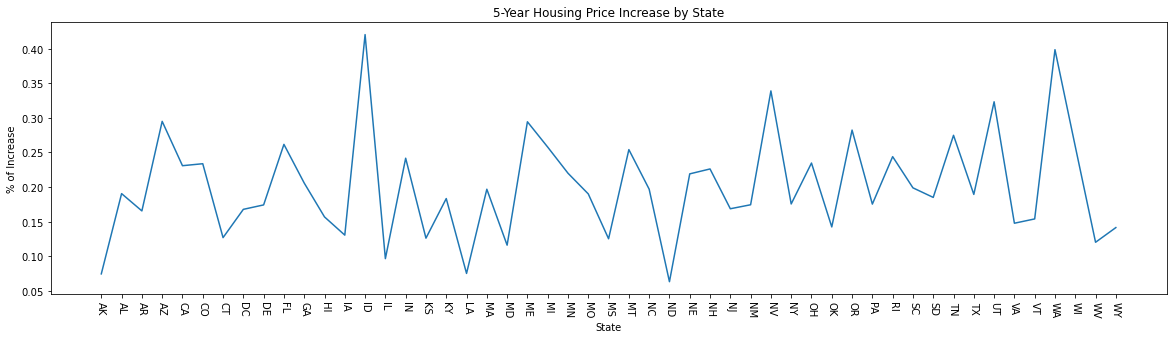

In [8]:
# Trend line graph
grouped_state.sort_values('% of Inc',ascending=False)
plt.figure(figsize=(20,5))
plt.plot(grouped_state.index.values,grouped_state['% of Inc'])
plt.xticks(rotation=-90)
plt.title("5-Year Housing Price Increase by State")
plt.xlabel("State")
plt.ylabel("% of Increase")
plt.show()

In [9]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)
census_pd.head()

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,B23025_005E,state
0,Minnesota,68411.0,5527358.0,37.9,36245.0,547442.0,119218.0,27
1,Mississippi,43567.0,2988762.0,37.2,23434.0,599795.0,110036.0,28
2,Missouri,53560.0,6090062.0,38.5,29537.0,837930.0,155958.0,29
3,Montana,52559.0,1041732.0,39.8,29765.0,139063.0,22433.0,30
4,Nebraska,59116.0,1904760.0,36.4,31101.0,213790.0,36545.0,31


In [10]:
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,27,Minnesota,5527358.0,37.9,68411.0,36245.0,547442.0,9.904225,2.156871
1,28,Mississippi,2988762.0,37.2,43567.0,23434.0,599795.0,20.068343,3.681658
2,29,Missouri,6090062.0,38.5,53560.0,29537.0,837930.0,13.758973,2.560861
3,30,Montana,1041732.0,39.8,52559.0,29765.0,139063.0,13.349211,2.153433
4,31,Nebraska,1904760.0,36.4,59116.0,31101.0,213790.0,11.223986,1.918614


In [11]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_pd.to_csv("census_data_states.csv", encoding="utf-8", index=False)

In [12]:
# Read in the csv containing state centroid coordinates
centroids = pd.read_csv("state_centroids.csv")
centroids.head()

,State,Latitude,Longitude
0,Alabama,32.7794,-86.8287
1,Alaska,64.0685,-152.2782
2,Arizona,34.2744,-111.6602
3,Arkansas,34.8938,-92.4426
4,California,37.1841,-119.4696


In [13]:
# Merge the datasets using the sate columns
census_data = pd.merge(census_pd, centroids, how="left", left_on="Name", right_on="State")

# Save the updated dataframe as a csv
census_data.to_csv("state_census_data.csv", encoding="utf-8", index=False)
census_data

,State_x,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,State_y,Latitude,Longitude
0,27,Minnesota,5527358.0,37.9,68411.0,36245.0,547442.0,9.904225,2.156871,Minnesota,46.2807,-94.3053
1,28,Mississippi,2988762.0,37.2,43567.0,23434.0,599795.0,20.068343,3.681658,Mississippi,32.7364,-89.6678
2,29,Missouri,6090062.0,38.5,53560.0,29537.0,837930.0,13.758973,2.560861,Missouri,38.3566,-92.4580
3,30,Montana,1041732.0,39.8,52559.0,29765.0,139063.0,13.349211,2.153433,Montana,47.0527,-109.6333
4,31,Nebraska,1904760.0,36.4,59116.0,31101.0,213790.0,11.223986,1.918614,Nebraska,41.5378,-99.7951
5,32,Nevada,2922849.0,37.9,57598.0,29961.0,393431.0,13.460531,3.481124,Nevada,39.3289,-116.6312
6,33,New Hampshire,1343622.0,42.7,74057.0,38548.0,102352.0,7.617619,2.261946,New Hampshire,43.6805,-71.5811
7,34,New Jersey,8881845.0,39.8,79363.0,40895.0,904132.0,10.179552,3.209739,New Jersey,40.1907,-74.6728
8,35,New Mexico,2092434.0,37.5,48059.0,26085.0,410389.0,19.612996,3.267487,New Mexico,34.4071,-106.1126
9,36,New York,19618453.0,38.7,65323.0,37470.0,2797985.0,14.262006,3.071781,New York,42.9538,-75.5268


In [14]:
#census_data(abbrev)"Name"
#census_data

abbreviations = {
    'Alabama': 'AL',
    'Alaska' : 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'AL': 'AL',
    'AK': 'AK',
    'AS': 'AS',
    'AZ': 'AZ',
    'AR': 'AR',
    'CA': 'CA',
    'CO': 'CO',
    'CT': 'CT',
    'DE': 'DE',
    'DC': 'DC',
    'FL': 'FL',
    'GA': 'GA',
    'GU': 'GU',
    'HI': 'HI',
    'ID': 'ID',
    'IL': 'IL',
    'IN': 'IN',
    'IA': 'IA',
    'KS': 'KS',
    'KY': 'KY',
    'LA': 'LA',
    'ME': 'ME',
    'MD': 'MD',
    'MA': 'MA',
    'MI': 'MI',
    'MN': 'MN',
    'MS': 'MS',
    'MO': 'MO',
    'MT': 'MT',
    'NE': 'NE',
    'NV': 'NV',
    'NH': 'NH',
    'NJ': 'NJ',
    'NM': 'NM',
    'NY': 'NY',
    'NC': 'NC',
    'ND': 'ND',
    'MP': 'MP',
    'OH': 'OH',
    'OK': 'OK',
    'OR': 'OR',
    'PA': 'PA',
    'PR': 'PR',
    'RI': 'RI',
    'SC': 'SC',
    'SD': 'SD',
    'TN': 'TN',
    'TX': 'TX',
    'UT': 'UT',
    'VT': 'VT',
    'VI': 'VI',
    'VA': 'VA',
    'WA': 'WA',
    'WV': 'WV',
    'WI': 'WI',
    'WY': 'WY'
}
census_data['Name'] = census_data['Name'].map(abbreviations)
census_data


,State_x,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,State_y,Latitude,Longitude
0,27,MN,5527358.0,37.9,68411.0,36245.0,547442.0,9.904225,2.156871,Minnesota,46.2807,-94.3053
1,28,MS,2988762.0,37.2,43567.0,23434.0,599795.0,20.068343,3.681658,Mississippi,32.7364,-89.6678
2,29,MO,6090062.0,38.5,53560.0,29537.0,837930.0,13.758973,2.560861,Missouri,38.3566,-92.4580
3,30,MT,1041732.0,39.8,52559.0,29765.0,139063.0,13.349211,2.153433,Montana,47.0527,-109.6333
4,31,NE,1904760.0,36.4,59116.0,31101.0,213790.0,11.223986,1.918614,Nebraska,41.5378,-99.7951
5,32,NV,2922849.0,37.9,57598.0,29961.0,393431.0,13.460531,3.481124,Nevada,39.3289,-116.6312
6,33,NH,1343622.0,42.7,74057.0,38548.0,102352.0,7.617619,2.261946,New Hampshire,43.6805,-71.5811
7,34,NJ,8881845.0,39.8,79363.0,40895.0,904132.0,10.179552,3.209739,New Jersey,40.1907,-74.6728
8,35,NM,2092434.0,37.5,48059.0,26085.0,410389.0,19.612996,3.267487,New Mexico,34.4071,-106.1126
9,36,NY,19618453.0,38.7,65323.0,37470.0,2797985.0,14.262006,3.071781,New York,42.9538,-75.5268


In [20]:
#merge census data with grouped state data
merge_data_df = pd.merge(grouped_state,census_data,how="left", left_on="StateName", right_on="Name")

merge_data_df.head()


,RegionID,SizeRank,9/30/2016,9/30/2017,9/30/2018,9/30/2019,9/30/2020,% of Inc,State_x,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,State_y,Latitude,Longitude
0,394595.000000,565.750000,308459.500000,316272.750000,319276.000000,332741.750000,332180.500000,0.074364,02,AK,738516.0,34.0,76715.0,35874.0,77865.0,10.543441,3.800459,Alaska,64.0685,-152.2782
1,411830.333333,374.619048,112818.809524,116453.809524,122060.904762,127214.428571,135227.476190,0.190491,01,AL,4864680.0,38.9,48486.0,26846.0,829400.0,17.049426,3.040241,Alabama,32.7794,-86.8287
2,412656.200000,571.250000,91220.900000,94984.800000,98921.950000,103107.400000,106684.900000,0.165465,05,AR,2990671.0,37.9,45726.0,25635.0,510337.0,17.064298,2.533679,Arkansas,34.8938,-92.4426
3,394988.727273,325.272727,191720.181818,203693.090909,217927.636364,230183.272727,248400.000000,0.295034,04,AZ,6946685.0,37.4,56213.0,29265.0,1092192.0,15.722492,3.026105,Arizona,34.2744,-111.6602
4,426591.235294,222.500000,396921.454545,421064.264706,452449.382353,452734.352941,480126.794118,0.230878,06,CA,39148760.0,36.3,71228.0,35021.0,5487141.0,14.016130,3.375591,California,37.1841,-119.4696


In [22]:
five_year_data = merge_data_df.drop(['RegionID', 'SizeRank', 'State_x', 'Per Capita Income', 'Poverty Count', 
                    'Poverty Rate', 'State_y'], axis=1)


# Save the updated dataframe as a csv
five_year_data.to_csv("five_year_data.csv", encoding="utf-8", index=False)
                          
                         


In [23]:
# Read in the csv containing reduced data
#updated_merged_data_df = pd.read_csv('updated_merged_data.csv')
#updated_merged_data_df.head()




In [ ]:
# Top 5 biggest % increases by State
#top_5 = new.nlargest(5, ['% of Inc'])
#top_5_df.head()

In [ ]:
# Bottom 5 % increase by State
#bottom_5 = new.nsmallest(5, ['% of Inc'])
#top_5_df.head()